In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

In [4]:

ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [6]:
data = data[['Close']]

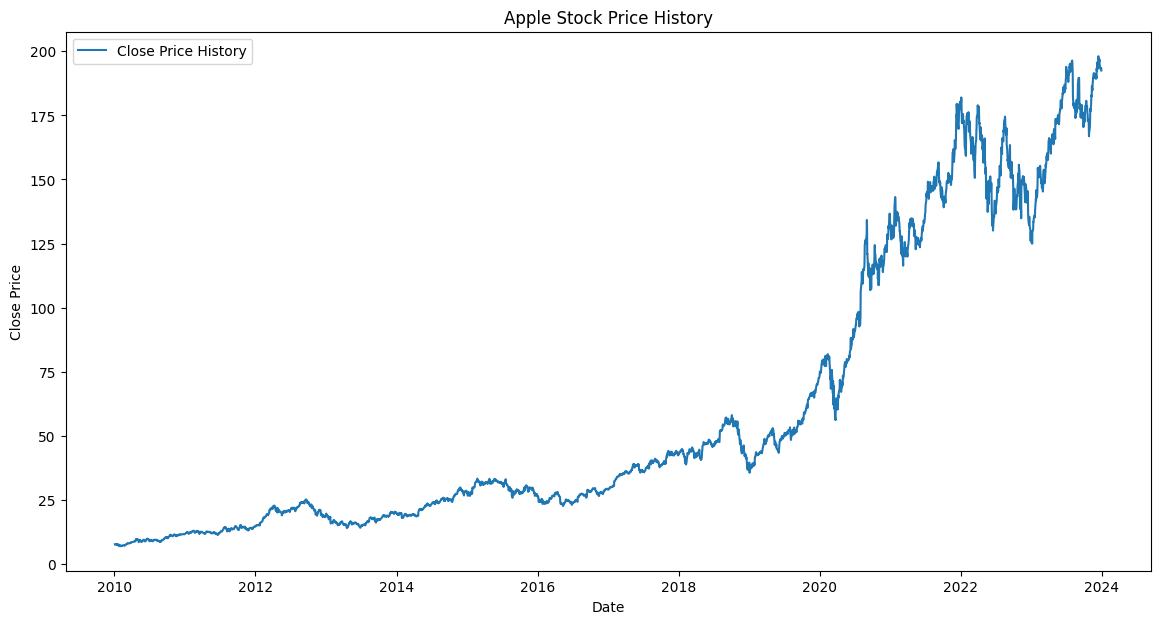

In [7]:
#closing price history
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price History')
plt.title('Apple Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [9]:
#scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [10]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [11]:
time_step = 60
X, y = create_dataset(scaled_data, time_step)

In [12]:
#reshape data
X = X.reshape(X.shape[0], X.shape[1], 1)

In [13]:

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [14]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 4.4245e-05 - val_loss: 0.0015
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 4.6864e-05 - val_loss: 0.0011
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 4.4774e-05 - val_loss: 0.0011
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 3.6319e-05 - val_loss: 8.3754e-04
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 4.9297e-05 - val_loss: 7.7460e-04
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 3.6613e-05 - val_loss: 7.2850e-04
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 3.9238e-05 - val_loss: 7.1904e-04
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 3.5206e-05 - val_loss: 6.6204e-04
Epoch 10/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 2.6177e-05 - val_loss: 6.2130e-04


In [17]:
predictions = model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [18]:

predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

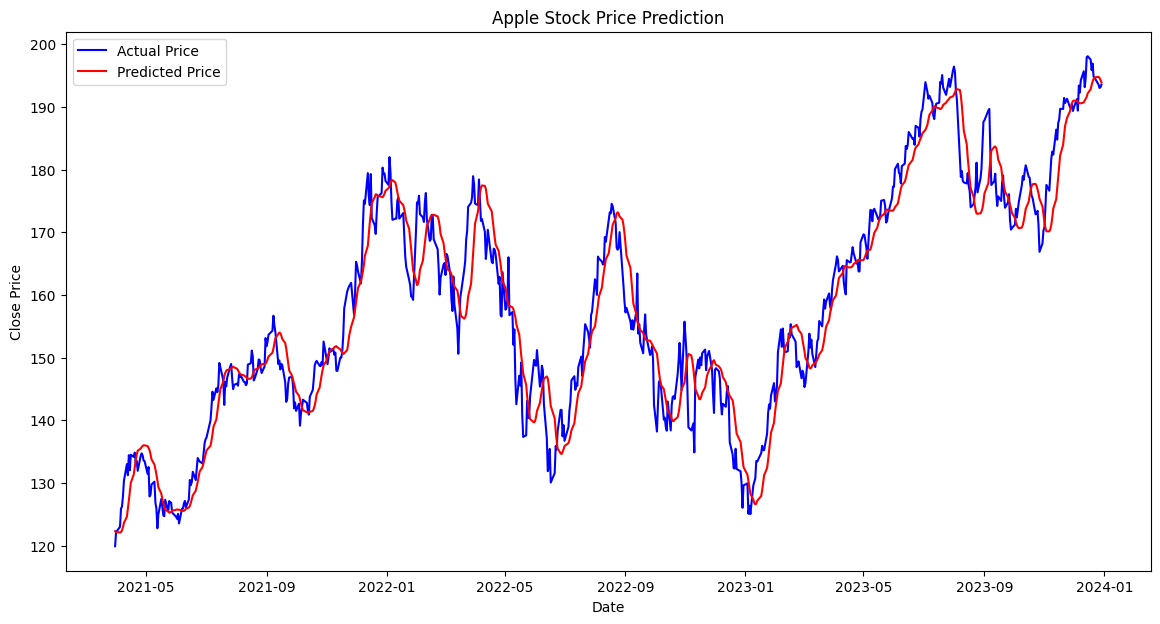

In [19]:
#plotting predicted and actual price
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test_inv, color='blue', label='Actual Price')
plt.plot(data.index[-len(predictions):], predictions, color='red', label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()